# Project Introduction

Every time we do an analysis, we need to formulate several testing and test analyzes that we need to test further. Sometimes, the tests we do lead us to accept the hypothesis, other times we also need to reject it. To make the right decisions in business, we must understand whether the assumptions we make are correct or not.

In this project as an analyst I have been given a database of one of the companies competing in this industry. The database contains data about books, publishers, authors, as well as customer ratings and reviews of related books. This information will be used in making a price quote for a new product.

## Purpose:
1. Count the number of books released after January 1, 2000
2. Calculate the number of user reviews and the average rating for each book
3. Identify publishers who have published the highest number of books, with more than 50 pages
4. Identify authors with the highest average book rating: find books with a rating of at least 50
5. Calculates the average number of review texts among users who rated more than 50 books

## Steps
As for the data that we will retrieve and analyze stored in several tables:
- `books`
- `authors`
- `publishers`
- `ratings`
- `reviews`

There are several steps of the analysis this time, namely:
1. Download data and prepare it for analysis
2. Data exploration
3. Explorative data analysis
4. Conclusion

**This is a schematic / diagram of the table and its relations**
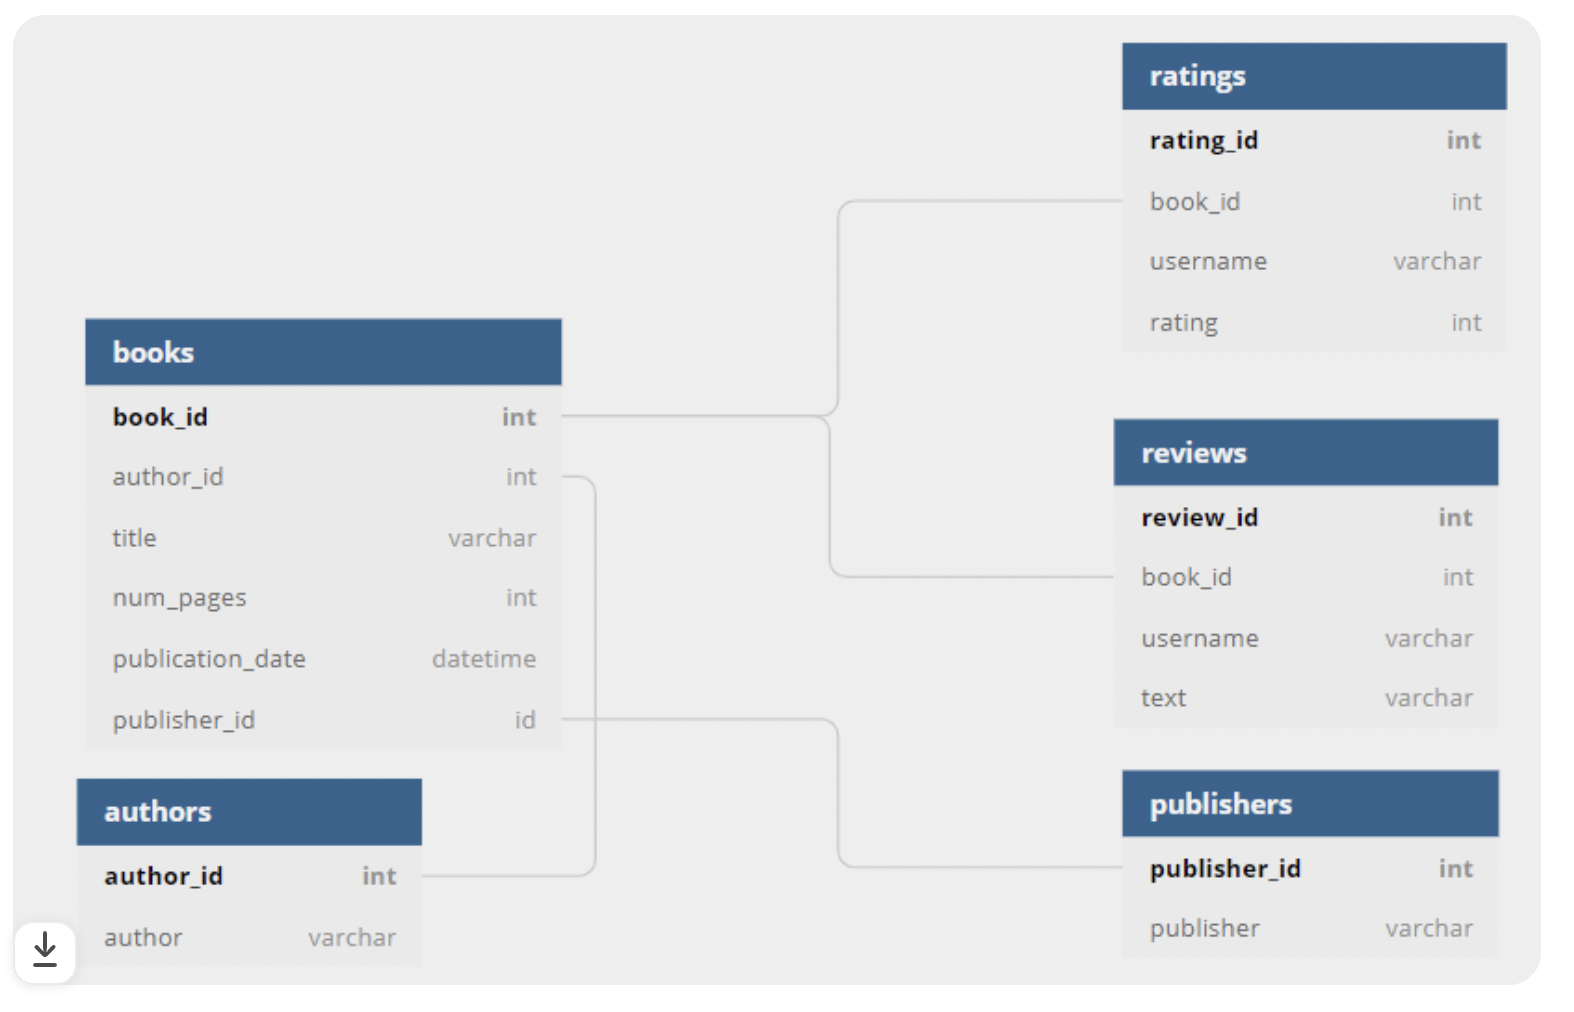

# Step 1. Download data and prepare it for analysis

## Create library

In [1]:
# import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # nama pengguna
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # kata sandi
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # port koneksi
             'db': 'data-analyst-final-project-db'}          # nama database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Load the data

In the following Data Overview, we'll open up the data using `head()`, `info()`, `describe()`, and `isnull().sum()` functions to further explore the dataset.

### Books
    
This `Books` table contains the following columns:
- book_id — Book ID
- author_id — Author ID
- title — the title of the book
- num_pages — the number of pages
- publication_date — publication date
- publisher_id — Publisher ID

In [2]:
# read dataset
query = "SELECT * FROM books"
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
books.title.unique()

array(["'Salem's Lot", '1 000 Places to See Before You Die',
       '13 Little Blue Envelopes (Little Blue Envelope  #1)',
       '1491: New Revelations of the Americas Before Columbus', '1776',
       "1st to Die (Women's Murder Club  #1)",
       "2nd Chance (Women's Murder Club  #2)",
       "4th of July (Women's Murder Club  #4)", 'A Beautiful Mind',
       'A Bend in the Road', 'A Breath of Snow and Ashes (Outlander  #6)',
       'A Brief History of Time',
       'A Caress of Twilight (Merry Gentry  #2)',
       'A Christmas Carol and Other Christmas Writings',
       'A Clash of Kings  (A Song of Ice and Fire  #2)',
       'A Crown of Swords (The Wheel of Time  #7)',
       'A Dirty Job (Grim Reaper  #1)',
       'A Drink Before the War (Kenzie & Gennaro  #1)', 'A Fine Balance',
       'A Fistful of Charms (The Hollows  #4)',
       'A Game of You (The Sandman  #5)',
       'A Great and Terrible Beauty (Gemma Doyle #1)',
       'A Hat Full of Sky (Discworld  #32; Tiffany Aching  

In [4]:
# getting dataset infromation
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
# getting statical information about our dataset
books.describe()

,book_id,author_id,num_pages,publisher_id
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,320.417000,389.11100,171.270000
std,288.819436,181.620172,229.39014,99.082685
min,1.000000,1.000000,14.00000,1.000000
25%,250.750000,162.750000,249.00000,83.000000
50%,500.500000,316.500000,352.00000,177.500000
75%,750.250000,481.000000,453.00000,258.000000
max,1000.000000,636.000000,2690.00000,340.000000


In [6]:
# check for missing value
books.isnull().sum()

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

In [7]:
# check for duplicate data
books.duplicated().sum()

0

All data and features look great and complete, there is no missing value found. However, there is still a data type that needs to be fixed, namely the `publication_date` column tobe datetime.

### Authors

This `Authors` table contains the following columns:
- author_id — Author ID
- author — the name of the author


In [8]:
# read dataset
query = "SELECT * FROM authors"
authors = pd.io.sql.read_sql(query, con = engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [9]:
# getting dataset infromation
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
authors.author.unique()

array(['A.S. Byatt', 'Aesop/Laura Harris/Laura Gibbs', 'Agatha Christie',
       'Alan Brennert', 'Alan Moore/David   Lloyd', 'Alan Paton',
       "Albert Camus/Justin O'Brien", 'Aldous Huxley',
       'Aldous Huxley/Christopher Hitchens',
       'Aleksandr Solzhenitsyn/H.T. Willetts', 'Alexander McCall Smith',
       'Alexander Pushkin/James E. Falen', 'Alexandre Dumas/Robin Buss',
       'Alice Hoffman', 'Alice Walker', 'Alison Bechdel',
       'Allen Ginsberg/William Carlos Williams', 'Amy Sedaris', 'Amy Tan',
       'Andy Warhol', 'Anita Diamant', 'Anita Shreve', 'Ann Brashares',
       'Ann Patchett', 'Ann Rule', 'Ann-Marie MacDonald', 'Anna Quindlen',
       'Anna Sewell', 'Anne Fadiman', 'Anne Lamott', 'Anne McCaffrey',
       'Anne Rice', 'Anonymous/N.K. Sandars', 'Anthony Bourdain',
       'Aristophanes/Sarah Ruden', 'Art Spiegelman',
       'Arthur  Miller/Christopher Bigsby',
       'Arthur Conan Doyle/Anne Perry/Sidney Paget', 'Arthur Golden',
       'Astrid Lindgren/Floren

In [11]:
# getting statical information about our dataset
authors.describe()

,author_id
count,636.000000
mean,318.500000
std,183.741666
min,1.000000
25%,159.750000
50%,318.500000
75%,477.250000
max,636.000000


In [12]:
# check for missing values
authors.isnull().sum()

author_id    0
author       0
dtype: int64

In [13]:
# check for duplicates
authors.duplicated().sum()

0

Everything looks fine, all the features are good and there is no missing value or duplicate data found.

### Publishers

This `Publishers` table contains the following columns:
- publisher_id — Publisher ID
- publisher — publisher name

In [14]:
# read dataset
query = "SELECT * FROM publishers"
publishers = pd.io.sql.read_sql(query, con = engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [15]:
# getting dataset infromation
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [16]:
publishers.publisher.unique()

array(['Ace', 'Ace Book', 'Ace Books', 'Ace Hardcover',
       'Addison Wesley Publishing Company', 'Aladdin',
       'Aladdin Paperbacks', 'Albin Michel', 'Alfred A. Knopf',
       'Alfred A. Knopf Books for Young Readers',
       'Alfred A. Knopf Borzoi Books', 'Algonquin Books', 'Allen & Ulwin',
       'Amistad', 'Anchor', 'Anchor Books',
       'Anchor Books/Knopf Doubleday Publishing Group',
       'Andrews McMeel Publishing', 'Applewood Books', 'Arrow',
       'Arrow Books', 'Arrow Books Ltd', 'Arthur A. Levine Books',
       'Arthur A. Levine Books / Scholastic Inc.',
       'Atheneum Books for Young Readers',
       'Atheneum Books for Young Readers: Richard Jackson Books',
       'Atria Books', 'Avon', 'Avon Books', 'BALLANTINE BOOKS',
       'Back Bay Books', 'Baen Books', 'Ballantine Books',
       'Ballantine Books (NY)', 'Bantam', 'Bantam Books',
       'Bantam Books  Inc.', 'Bantam Classics',
       'Bantam Doubleday Dell (NYC)', 'Bantam Spectra', 'Bantem Press',
       '

In [17]:
# check for missing values
publishers.isnull().sum()

publisher_id    0
publisher       0
dtype: int64

In [18]:
# check for duplicates
publishers.duplicated().sum()

0

All data and features from this dataset looks great and complete, there is nothing to be fixed.

### Ratings

Contains data about user reviews:
- rating_id — Rating ID
- book_id — Book ID
- username — the username that gave the book rating
- ratings

In [19]:
# read dataset
query = "SELECT * FROM ratings"
ratings = pd.io.sql.read_sql(query, con = engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [20]:
# getting dataset infromation
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [21]:
ratings.username.unique()

array(['ryanfranco', 'grantpatricia', 'brandtandrea', 'lorichen',
       'mariokeller', 'johnsonamanda', 'scotttamara', 'lesliegibbs',
       'abbottjames', 'valenciaanne', 'jeromebowen', 'staylor', 'susan85',
       'npowers', 'znelson', 'thomas49', 'eallen', 'shermannatalie',
       'martinadam', 'serranoangela', 'adamsabigail', 'sfitzgerald',
       'walter49', 'jasongoodman', 'shannonsutton', 'kevin78', 'carla64',
       'robert56', 'williamsangela', 'cassandra90', 'richard89',
       'ashleymalone', 'ehall', 'tara26', 'tanya01', 'lharvey', 'ryan01',
       'laura42', 'jessica49', 'stacyfrost', 'brentpowers', 'isaiahreyes',
       'ncurry', 'amymckenzie', 'daniel19', 'amy97', 'lewisdesiree',
       'todd65', 'ulowe', 'jhill', 'patriciajohnson', 'bobbyhood',
       'odavila', 'zjohnston', 'jarvispaul', 'rmiller', 'ewerner',
       'millernicholas', 'ashleyjoshua', 'andrewfox', 'shafferrobert',
       'markdunn', 'joseph14', 'qadams', 'martinyvonne', 'nicole53',
       'sabrinabrown'

In [22]:
# getting statical information about our dataset
ratings.describe()

,rating_id,book_id,rating
count,6456.000000,6456.000000,6456.000000
mean,3228.500000,510.574195,3.928284
std,1863.831001,284.141636,0.943303
min,1.000000,1.000000,1.000000
25%,1614.750000,291.000000,3.000000
50%,3228.500000,506.000000,4.000000
75%,4842.250000,750.000000,5.000000
max,6456.000000,1000.000000,5.000000


In [23]:
# check for missing values
ratings.isnull().sum()

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

In [24]:
# cehck for duplicates
ratings.duplicated().sum()

0

All the data and features seem to be fine, there is no missing value or duplicates on this dataset.

### Reviews

Contains data about customer reviews:
- review_id — Review ID
- book_id — Book ID
- username — the name of the user who reviewed the book
- text — review text

In [25]:
# read dataset
query = "SELECT * FROM reviews"
reviews = pd.io.sql.read_sql(query, con = engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [26]:
# getting dataset infromation
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [27]:
# getting statical information about our dataset
reviews.describe()

,review_id,book_id
count,2793.000000,2793.000000
mean,1397.000000,504.693161
std,806.413976,288.472931
min,1.000000,1.000000
25%,699.000000,259.000000
50%,1397.000000,505.000000
75%,2095.000000,753.000000
max,2793.000000,1000.000000


In [28]:
# check for missing values
reviews.isnull().sum()

review_id    0
book_id      0
username     0
text         0
dtype: int64

In [29]:
# check for duplicates
reviews.duplicated().sum()

0

All features look great and complete, there is no problem in this dataset. Either missing value or duplicate not found.

## Data exploration (Convert Data Type)

- **Convert Data Type `publication_date`**

In [30]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [31]:
books.dtypes

book_id              int64
author_id            int64
title               object
num_pages            int64
publication_date    object
publisher_id         int64
dtype: object

In [32]:
books['publication_date'] = pd.to_datetime(books['publication_date'])
books.dtypes

book_id                      int64
author_id                    int64
title                       object
num_pages                    int64
publication_date    datetime64[ns]
publisher_id                 int64
dtype: object

Data type conversion was successful.

# Step 2. Explorative Data Analysis

## Count the number of books released after January 1, 2000

In [33]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [34]:
query = '''
SELECT
    COUNT(*) as book_number
FROM
    books
WHERE
    publication_date > '2000-01-01'
'''
book_number = pd.io.sql.read_sql(query, con = engine)
book_number

,book_number
0,819


The total number of books released after January 1, 2000 was 819 books.

## Calculate the number of user reviews and the average rating for each book

- **The number of user reviews for each book**

In [47]:
query = '''
SELECT 
                books.title,
                COUNT(DISTINCT review_id) AS review_count
            FROM
                books
                LEFT JOIN reviews on books.book_id = reviews.book_id
            GROUP BY
                books.book_id
            ORDER BY
                review_count DESC
            LIMIT 10
'''
review_number = pd.io.sql.read_sql(query, con = engine)
review_number

,title,review_count
0,Twilight (Twilight #1),7
1,The Da Vinci Code (Robert Langdon #2),6
2,Eat Pray Love,6
3,The Alchemist,6
4,The Catcher in the Rye,6
5,The Curious Incident of the Dog in the Night-Time,6
6,Harry Potter and the Prisoner of Azkaban (Harr...,6
7,Harry Potter and the Chamber of Secrets (Harry...,6
8,Outlander (Outlander #1),6
9,The Book Thief,6


As we can see that here is the top 10 lists of user reviews number per each book. The top 1 belongs to Twillight which followed by two other books (The Da Vinci Code and Eat Pray Love). And for the bottom 3 are belong to Harry Potter and the Chamber of Secrets, Outlander and The Book Thief	.

- **The average rating for each book**

In [48]:
query = '''
SELECT 
                books.title,
                AVG(rating) AS rating_avg,
                COUNT(DISTINCT review_id) AS review_count
            FROM
                books
                LEFT JOIN ratings ON books.book_id = ratings.book_id
                LEFT JOIN reviews on books.book_id = reviews.book_id
            GROUP BY
                books.book_id
            ORDER BY
                review_count DESC,
                rating_avg DESC
            LIMIT 10
'''
avg_rating = pd.io.sql.read_sql(query, con = engine)
avg_rating

,title,rating_avg,review_count
0,Twilight (Twilight #1),3.662500,7
1,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,6
2,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,The Book Thief,4.264151,6
4,The Glass Castle,4.206897,6
5,Outlander (Outlander #1),4.125000,6
6,The Hobbit or There and Back Again,4.125000,6
7,The Curious Incident of the Dog in the Night-Time,4.081081,6
8,The Lightning Thief (Percy Jackson and the Oly...,4.080645,6
9,Water for Elephants,3.977273,6


## Identify publishers who have published the highest number of books, with more than 50 pages

In [37]:
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [38]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [39]:
query = '''
SELECT
    publishers.publisher_id AS publisher_id,
    publishers.publisher AS publisher,
    COUNT(DISTINCT(books.book_id)) AS number_of_books
FROM
    publishers
    INNER JOIN books ON books.publisher_id = publishers.publisher_id
WHERE
    books.num_pages > 50
GROUP BY
    publishers.publisher_id, publishers.publisher
ORDER BY
    number_of_books DESC
LIMIT 20;
'''
publisher_list = pd.io.sql.read_sql(query, con = engine)
publisher_list

,publisher_id,publisher,number_of_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,35,Bantam,19
5,33,Ballantine Books,19
6,45,Berkley,17
7,46,Berkley Books,14
8,284,St. Martin's Press,14
9,333,William Morrow Paperbacks,13


In [40]:
publisher_list.head()

,publisher_id,publisher,number_of_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,35,Bantam,19


Here is the list for all the publishers who have published the highest number of books, with more than 50 pages.

## Identify authors with the highest average book rating: find books with a rating of at least 50

In [41]:
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [42]:
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [43]:
query = '''
SELECT
                  authors.author,
                  AVG (subquery2.avg_rating) as final_avg            
              FROM
                  (SELECT
                      books.title,
                      books.author_id,
                      subquery1.avg_rating
                  FROM
                      (SELECT
                          book_id,
                          COUNT (rating_id) AS rating_cnt,
                          AVG (rating) AS avg_rating
                      FROM
                          ratings
                      GROUP BY
                          book_id
                      HAVING
                          COUNT (rating_id) > 50) AS subquery1
                      INNER JOIN books ON books.book_id = subquery1.book_id) AS subquery2
                  INNER JOIN authors ON authors.author_id = subquery2.author_id
              GROUP BY
                  author
              ORDER BY
                  final_avg DESC
              LIMIT 5
'''
max_rate = pd.io.sql.read_sql(query, con = engine)
max_rate

,author,final_avg
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


From the results shown, there are top 5 authors with the highest average book rating, and here is the list:
1. J.K. Rowling/Mary GrandPrém (4.83844)
2. Markus Zusak/Cao Xuân Việt Khương (4.264151)
3. J.R.R. Tolkien (4.258446)
4. Louisa May Alcott (4.192308)
5. Rick Riordan	(4.080645)

## Calculates the average number of review texts among users who rated more than 50 books

In [44]:
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [45]:
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [46]:
query = '''
select AVG(Sub.cnt_reviews)\
    AS avg_review FROM (select ratings.username,COUNT(DISTINCT ratings.book_id)\
    AS cnt_rating, COUNT(DISTINCT reviews.review_id)\
    AS cnt_reviews FROM ratings LEFT OUTER JOIN reviews\
    ON ratings.username=reviews.username and ratings.book_id=reviews.book_id group by ratings.username\
    having COUNT(DISTINCT ratings.book_id)>50) AS Sub;
'''
avg_review = pd.io.sql.read_sql(query, con = engine)
avg_review

,avg_review
0,24.333333


So here it is for  the number of review texts among users is around 24 reviews.

# 3  Step 3. Conclusion

For this SQL project, we can conclude that:
1. The total number of books released after January 1, 2000 was 819 books
2. There are 42 authors with the highest average book rating
3. The number of review texts among users is around 24 reviews
